# Geospatial Data Visualization

I have been tasked to use geospatial visualization tools to create a choropleth map to illustrate how prices for a 4-Room HDB resale flat vary across different areas of Singapore. Using the map, provide a description of the possible association between HDB resale prices and distance to the CBD.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

# Import Data

In [2]:
# Importing Housing Dataset
df = pd.read_csv("../datasets/resale-flat-prices/clean_resale_price.csv")

In [3]:
# Importing Singapore Map SHP file
sg = gpd.read_file('../datasets/master-plan-2014-planning-area-boundary-no-sea-shp/MP14_PLNG_AREA_NO_SEA_PL.shp')

# Prepare Data for Visualization

In [4]:
# Filter to Only 4 Room Flats
df = df[df['flat_type'] == '4 ROOM']
df.shape

(300361, 19)

Filter to 2019 data as that is the most recent to current time. Hence, it will produce the most comparable resale prices. And the median value wouldnt be affected by prices from the distant past as prices in the past is alot cheaper.

In [5]:
# Set Month as index
df['month']= pd.to_datetime(df['month'])
df.set_index('month', drop= True, inplace= True)

In [6]:
# Filter to 2019
df = df['2019'].copy()

# Check Data

In [7]:
sg.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((30658.500 42047.527, 30679.195 42020..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((38974.269 36138.243, 39371.471 35747..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((29772.191 38311.805, 29784.826 38304..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((12861.383 32207.492, 12860.555 32208..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((20294.455 39114.528, 20334.318 39054..."


In [8]:
df.head()

,block,flat_model,flat_type,floor_area_sqm,latitude,lease_commence_date,longtitude,remaining_lease,resale_price,storey_range,street_name,town,mrt_lat,mrt_long,dist_mrt,dist_cbd,dist_ap,mature
month,,,,,,,,,,,,,,,,,,
2019-01-01,335,NEW GENERATION,4 ROOM,91.0,1.363210,1982,103.850691,61,428000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,1.369429,103.849455,0.704981,8.815586,15.264171,1
2019-01-01,205,NEW GENERATION,4 ROOM,98.0,1.366941,1977,103.843582,56,408000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO,1.369429,103.849455,0.709023,9.271503,16.075486,1
2019-01-01,310C,MODEL A,4 ROOM,94.0,1.364609,2012,103.844855,91,500000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,1.369429,103.849455,0.740810,9.000716,15.919362,1
2019-01-01,310B,MODEL A,4 ROOM,96.0,1.364643,2012,103.844257,91,750000.0,25 TO 27,ANG MO KIO AVE 1,ANG MO KIO,1.369429,103.849455,0.785557,9.010221,15.985947,1
2019-01-01,543,NEW GENERATION,4 ROOM,92.0,1.374301,1981,103.856236,60,370000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,1.369429,103.849455,0.928257,10.062446,14.753489,1


In [9]:
sg['PLN_AREA_N'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BOON LAY', 'BUKIT BATOK',
       'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'GEYLANG',
       'KALLANG', 'NOVENA', 'PASIR RIS', 'HOUGANG', 'JURONG EAST',
       'LIM CHU KANG', 'MANDAI', 'MARINE PARADE', 'NORTH-EASTERN ISLANDS',
       'PIONEER', 'JURONG WEST', 'PAYA LEBAR', 'PUNGGOL', 'QUEENSTOWN',
       'SELETAR', 'SEMBAWANG', 'SENGKANG', 'SERANGOON',
       'CENTRAL WATER CATCHMENT', 'CHANGI', 'SUNGEI KADUT', 'TAMPINES',
       'DOWNTOWN CORE', 'TANGLIN', 'TENGAH', 'TOA PAYOH', 'MARINA EAST',
       'WOODLANDS', 'MARINA SOUTH', 'MUSEUM', 'NEWTON', 'CHANGI BAY',
       'CHOA CHU KANG', 'CLEMENTI', 'SINGAPORE RIVER', 'STRAITS VIEW',
       'SIMPANG', 'SOUTHERN ISLANDS', 'TUAS', 'WESTERN ISLANDS',
       'WESTERN WATER CATCHMENT', 'YISHUN', 'ORCHARD', 'OUTRAM',
       'RIVER VALLEY', 'ROCHOR'], dtype=object)

In [10]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [11]:
df[df['town']== 'CENTRAL AREA']['street_name'].unique()

array(['CANTONMENT RD', 'KLANG LANE', 'KRETA AYER RD', 'VEERASAMY RD',
       'BUFFALO RD', 'CHANDER RD', 'TG PAGAR PLAZA', 'WATERLOO ST',
       'QUEEN ST', 'ROWELL RD', 'BAIN ST', 'CHIN SWEE RD', 'JLN BERSEH',
       'SMITH ST'], dtype=object)

## Convert town in central area from df to names in PLN_AREA_N. 

- Cantonment rd = downtown core
- klang lane = kallang
- kreta ayer rd = downtown core
- veerasamy rd = kallang
- buffalo rd = rochor
- chander rd = rochor
- tg pagar plaza = downtown core
- waterloo st = downtown core
- queen st = downtown core
- rowell rd = kallang
- bain st = downtown core
- chin swee rd = outram
- jln berseh = kallang
- smith st = downtown core
- kallang/whampoa = kallang

In [12]:
# Standardize Column
df.loc[(df['street_name'] == 'CANTONMENT RD'), 'town'] = 'DOWNTOWN CORE'
df.loc[(df['street_name'] == 'KRETA AYER RD'), 'town'] = 'DOWNTOWN CORE'
df.loc[(df['street_name'] == 'TG PAGAR PLAZA'), 'town'] = 'DOWNTOWN CORE'
df.loc[(df['street_name'] == 'WATERLOO ST'), 'town'] = 'DOWNTOWN CORE'
df.loc[(df['street_name'] == 'QUEEN ST'), 'town'] = 'DOWNTOWN CORE'
df.loc[(df['street_name'] == 'BAIN ST'), 'town'] = 'DOWNTOWN CORE'
df.loc[(df['street_name'] == 'SMITH ST'), 'town'] = 'DOWNTOWN CORE'
df.loc[(df['street_name'] == 'KLANG LANE'), 'town'] = 'KALLANG'
df.loc[(df['street_name'] == 'VEERASAMY RD'), 'town'] = 'KALLANG'
df.loc[(df['street_name'] == 'ROWELL RD'), 'town'] = 'KALLANG'
df.loc[(df['street_name'] == 'JLN BERSEH'), 'town'] = 'KALLANG'
df.loc[(df['street_name'] == 'KALLANG/WHAMPOA'), 'town'] = 'KALLANG'
df.loc[(df['street_name'] == 'BUFFALO RD'), 'town'] = 'ROCHER'
df.loc[(df['street_name'] == 'CHANDER RD'), 'town'] = 'ROCHER'
df.loc[(df['street_name'] == 'CHIN SWEE RD'), 'town'] = 'OUTRAM'

In [13]:
# Groupby town
df_g = df.groupby('town').median()

## Combine DataFrame

In [15]:
map_plot = sg.merge(df_g, left_on = 'PLN_AREA_N', right_on = 'town', how = 'left')

In [16]:
map_plot.columns

Index(['OBJECTID', 'PLN_AREA_N', 'PLN_AREA_C', 'CA_IND', 'REGION_N',
       'REGION_C', 'INC_CRC', 'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'floor_area_sqm', 'latitude',
       'lease_commence_date', 'longtitude', 'remaining_lease', 'resale_price',
       'mrt_lat', 'mrt_long', 'dist_mrt', 'dist_cbd', 'dist_ap', 'mature'],
      dtype='object')

# Plot Map

/Users/edwinotw/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


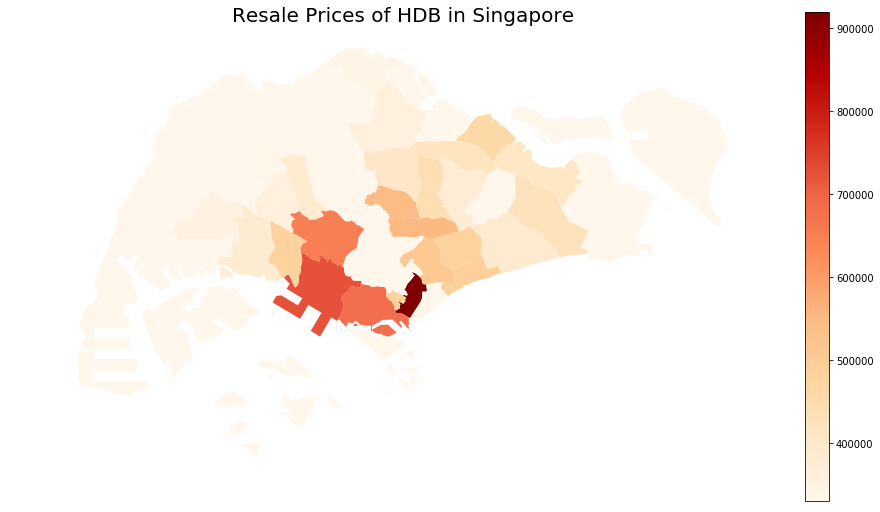

In [17]:
# Plot the Geo-Spatial Plot
fig, ax = plt.subplots(figsize = (16,9)) # Figure Size
ax.axis('off') # Remove Axis Borders
ax.set_title('Resale Prices of HDB in Singapore', fontsize = 20) # Title and Font size
map_plot.plot(ax = ax, legend = True, column = 'resale_price', cmap='OrRd') # Plot map
fig.savefig('map_export.png', dpi=300) # Save Figure

This Geo-Spatial Map represents resale prices of 4 room HDB flats in Singapore in the period of 2019. The lighter the red(Towards Beige), the lower the median prices of resale prices. The Darker the red, the higher the median price will be.

This Map is plotted using the Singapore Master Plan 2014 Planning Area Boundary.

From what we can see, the central areas in the map is darker in colour compared to the outer areas in Singapore. The colour gradually fades into a lighter color the further it is from the central area of Singapore.

What we can deduce from this is, the closer it is to the CBD area, resale HDB prices would exponentially increase, some areas in near CBD is around SGD 700000 to SGD 800000. There is one area that is the darkest colour, the median prices actually reaches SGD 900000. 

Outside for the CDB area, prices are balancing below SGD 500000 or SGD 400000 